<a href="https://colab.research.google.com/github/akshitgupta/Website_page_bidding_analytics/blob/main/Web_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_csv('Dataset2.csv')

In [ ]:
df.shape

(567291, 17)

In [ ]:
df.head(2)

,date,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,order_id,line_item_type_id,os_id,integration_type_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent
0,2019-06-30 00:00:00,351,10,187,2,84,3473,19,60,1,4,5174,16,0.0,2,16,1
1,2019-06-30 00:00:00,351,10,187,2,84,3473,19,58,1,4,5174,6,0.0,0,6,1


Revenue generated by each Ad type

,ad_type_id,total_revenue
0,10,38795.1592
1,17,767.9600


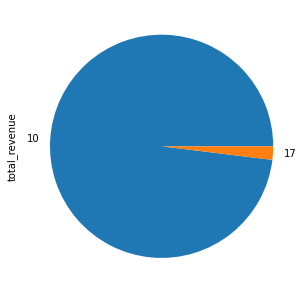

In [ ]:
df.drop(df.loc[df['total_revenue']==0].index, inplace=True)
df1=df.groupby(['ad_type_id']).sum()
df1['total_revenue'].plot(kind='pie',figsize=(5,6))
df1['total_revenue'].reset_index(level=0)

Top 5 revenue generating sites

,site_id,total_revenue
0,349,7543.9258
1,351,6059.4996
2,345,5450.2428
3,346,4770.9366
4,343,4638.6938


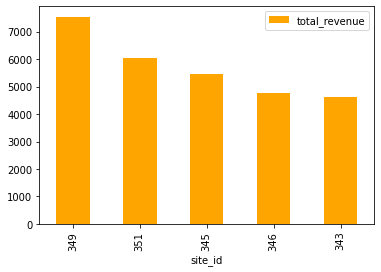

In [ ]:
df2=df.groupby(['site_id']).sum()
df2=df2.sort_values("total_revenue", axis = 0, ascending = False)
df2['total_revenue'].reset_index(level=0).head(5).plot.bar(x="site_id", y="total_revenue",color='orange')
df2['total_revenue'].reset_index(level=0).head(5)

Top 5 revenue generating Ad units

,ad_unit_id,total_revenue
0,5168,4058.3534
1,5159,1895.5006
2,5125,1826.2552
3,5175,1424.3960
4,5179,1293.7254


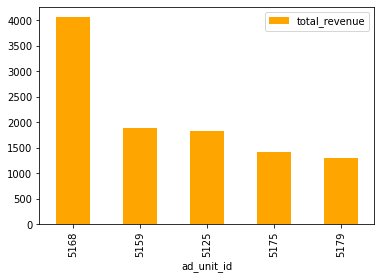

In [ ]:
df3=df.groupby(['ad_unit_id']).sum()
df3=df3.sort_values("total_revenue", axis = 0, ascending = False) 
df3['total_revenue'].reset_index(level=0).head(5).plot.bar(x="ad_unit_id", y="total_revenue",color='orange')
df3['total_revenue'].reset_index(level=0).head(5)

In [ ]:
df4=df[['site_id','ad_type_id','geo_id','advertiser_id','ad_unit_id','total_impressions','total_revenue']]
df4['win_bid_price']=(df4['total_revenue']/df4['total_impressions'])*1000
df4.reset_index(inplace = True)
df4.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,site_id,ad_type_id,geo_id,advertiser_id,ad_unit_id,total_impressions,total_revenue,win_bid_price
0,285,351,10,187,8,5177,168,0.3704,2.204762
1,286,351,10,187,8,5177,34,0.0958,2.817647


Bidder want to maintain same impression with deviation of 20%

Assumption- Bid price remain same and there will only be deviation in impressions

Then we will get following revenue range for july-

In [ ]:
df5['Inc_revenue']=((df5['total_impressions']*1.2)*df5['win_bid_price'])/1000
df5['Dec_revenue']=((df5['total_impressions']*0.8)*df5['win_bid_price'])/1000
maximum=round(df5['Inc_revenue'].sum(),2)
minimum=round(df5['Dec_revenue'].sum(),2)
print('Total revenue in month of June-',round(df['total_revenue'].sum(),2))
print('Potential revenue range for july-$',maximum,'-',minimum)

Total revenue in month of June- 39563.12
Potential revenue range for july-$ 47475.74 - 31650.5
